In [7]:
print("hello,world")

hello,world


In [8]:
#import necessary library
#pandas for importing csv
#numpy arrays for executing complex computations
#seaborn-high level interface for stat graphic
#matplotlib-create plots,charts n more

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
#initialize dataframe-using pandas

dataframe=pd.read_csv("zomato-data.csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [10]:
#rate is originally in string format X/5. Turn in to 
#float by splitting at /.

def handleRate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [11]:
#get summary of the dataframe-show datatype n everything
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of restaurant')

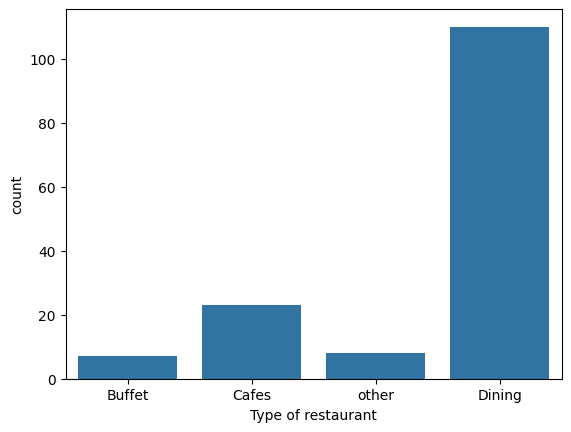

In [12]:
#exploring the listed_in(type) column.

sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")

#output shows that majority of the restaurants fall into dining category.

Text(0, 0.5, 'Votes')

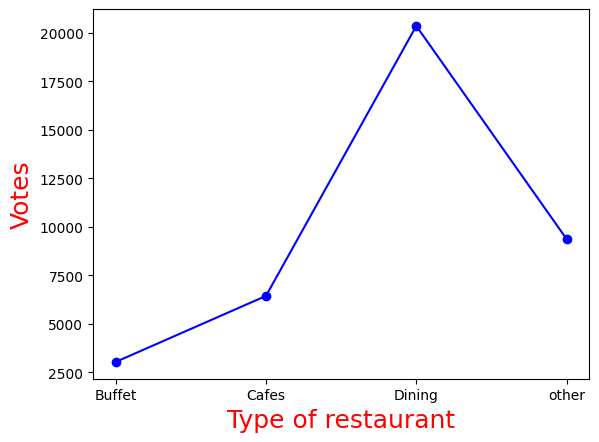

In [ ]:
#
grouped_data=dataframe.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,c='blue',marker='o')
plt.xlabel('Type of restaurant', c='red', size=18)
plt.ylabel('Votes',c='red',size=18)

# graph shows most of people preferred dining restaurants.

In [ ]:
#find the name of restaurant with maximum votes from the dataframe

max_votes=dataframe['votes'].max()
restaurant_with_max_votes=dataframe.loc[dataframe['votes']==max_votes,'name']
print('Restaurant(s) with maximum votes: ')
print(restaurant_with_max_votes)

#Found: Empire Restaurant-4884 votes

Restaurant(s) with maximum votes: 
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

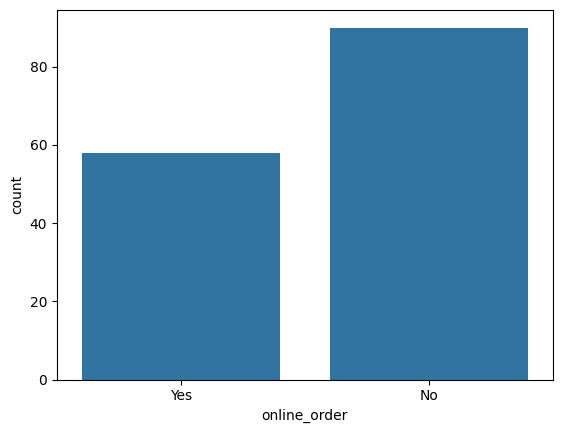

In [ ]:
#explore online-order column
sns.countplot(x=dataframe['online_order'])

# data shows majority of restaurants do not accept online orders

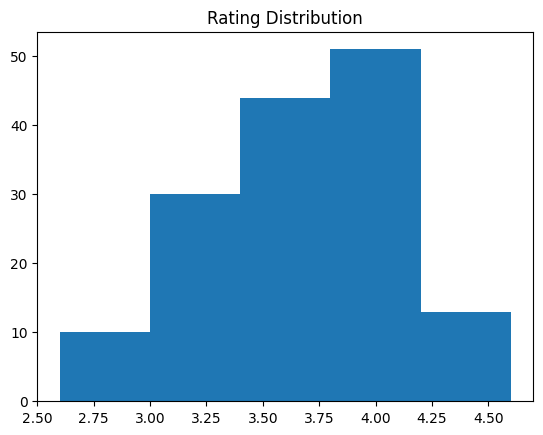

In [ ]:
# exploring rate column

plt.hist(dataframe['rate'],bins=5)
plt.title('Rating Distribution')
plt.show()

# histogram show that majority restaurants receive ratings ranging from 3.5 to 4

C:\Users\harizz\AppData\Local\Temp\ipykernel_21016\525294160.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=couple_data,palette="Spectral")


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

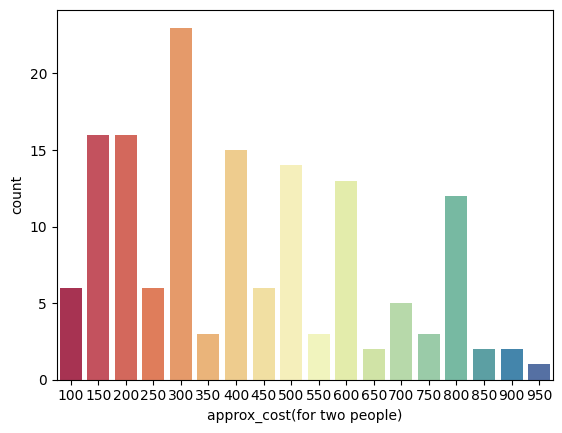

In [ ]:
# explore the approx_cost(for two people) column

couple_data=dataframe['approx_cost(for two people)']
sns.color_palette()
sns.countplot(x=couple_data,palette="Spectral")

# countplot show that most couple prefer restaurant with
# approximate cost of 300 rupees

C:\Users\harizz\AppData\Local\Temp\ipykernel_21016\334708176.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='online_order',y='rate',data=dataframe,palette='Set2')


<Axes: xlabel='online_order', ylabel='rate'>

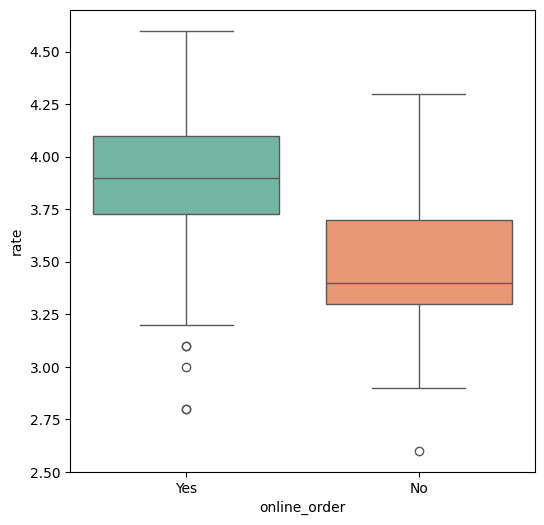

In [ ]:
# comparing if online orders receive higher ratings
# compared to offline_orders

plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=dataframe,palette='Set2')

#data shows online orders receive higher ratings
#compared to offline orders, which receive lower ratings

<function matplotlib.pyplot.show(close=None, block=None)>

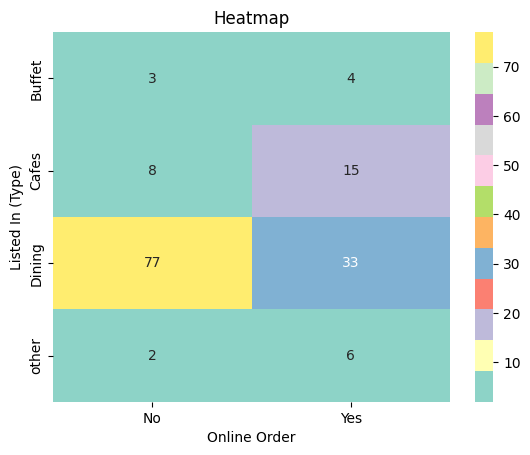

In [ ]:
pivot_table=dataframe.pivot_table(index='listed_in(type)', columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='Set3',fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show

#data shows that Dining restaurants primarily accept offline orders,
#while cafes primarily receive online orders. 
#This suggests that customer preferred to dine in-person
#at restaurants, but prefer ordering online at cafes